In [1]:
import os
from tqdm import tqdm
from PIL import Image
import random
from tensorflow import keras
import tensorflow as tf
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
import numpy as np
import glob
import cv2
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from functools import partial

import utils

In [2]:
dirpath = r"C:\Users\Alexandre\Downloads\FinalDataSet2"

size = [100,100]

train_images_load = np.empty((0,size[1], size[0]), int)
test_images_load = np.empty((0,size[1], size[0]), int)
train_labels_load = np.empty((0,1), int)
test_labels_load = np.empty((0,1), int)

x_train = np.empty((0,size[1], size[0]), int)
x_test = np.empty((0,size[1], size[0]), int)
y_train = np.empty((0,1), int)
y_test = np.empty((0,1), int)

trainPath = []
for path in os.listdir(dirpath):
    trainPath.append(path)

In [3]:
for path in os.listdir(dirpath):
    print(dirpath+"\\"+path)
    count = 1
    testImageNumber = random.sample(range(0,len(glob.glob(dirpath+"\\"+path+"\\*.png"))),round(len(glob.glob(dirpath+"\\"+path+"\\*.png"))*0.2))
    #on génére une suite de nombre aléatoire unique en regardant combien d'image se trouve dans le fichier, permet de séparer train/test
    label = trainPath.index(path)
    for png in tqdm(glob.glob(dirpath+"\\"+path+"\\*.png")):
        count+=1
        image = cv2.imread(png,0)
        image = cv2.resize(image, (100, 100))
        
        if (count%40 == 39):
            x_train = np.append(x_train, train_images_load, axis=0)
            x_test = np.append(x_test, test_images_load, axis=0)
            y_train = np.append(y_train, train_labels_load, axis=0)
            y_test = np.append(y_test, test_labels_load, axis=0)
            
            train_images_load = np.empty((0,size[1], size[0]), int)
            test_images_load = np.empty((0,size[1], size[0]), int)
            train_labels_load = np.empty((0,1), int)
            test_labels_load = np.empty((0,1), int)
            
        if (count in testImageNumber):
            test_images_load = np.append(test_images_load, [image], axis=0)
            test_labels_load = np.append(test_labels_load, [[label]], axis=0)
        else:     
            train_images_load = np.append(train_images_load, [image],axis = 0)
            train_labels_load = np.append(train_labels_load, [[label]], axis = 0)
            

x_train = np.append(x_train, train_images_load, axis=0)
x_test = np.append(x_test, test_images_load, axis=0)
y_train = np.append(y_train, train_labels_load, axis=0)
y_test = np.append(y_test, test_labels_load, axis=0)

x_train, x_test = x_train / 255.0, x_test / 255.0
print("training image shape : "+str(x_train.shape))
print("testing  image shape : "+str(x_test.shape)+"\n")

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.20, shuffle=True)

C:\Users\Alexandre\Downloads\FinalDataSet2\A


100%|█████████████████████████████████████████████████████████████████████████████████| 82/82 [00:00<00:00, 197.12it/s]


C:\Users\Alexandre\Downloads\FinalDataSet2\B


100%|█████████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<00:00, 833.33it/s]


C:\Users\Alexandre\Downloads\FinalDataSet2\C


100%|█████████████████████████████████████████████████████████████████████████████████| 84/84 [00:00<00:00, 700.01it/s]


C:\Users\Alexandre\Downloads\FinalDataSet2\D


100%|█████████████████████████████████████████████████████████████████████████████████| 82/82 [00:00<00:00, 539.47it/s]


C:\Users\Alexandre\Downloads\FinalDataSet2\E


100%|█████████████████████████████████████████████████████████████████████████████████| 82/82 [00:00<00:00, 186.37it/s]


C:\Users\Alexandre\Downloads\FinalDataSet2\F


100%|█████████████████████████████████████████████████████████████████████████████████| 93/93 [00:00<00:00, 198.68it/s]


C:\Users\Alexandre\Downloads\FinalDataSet2\G


100%|█████████████████████████████████████████████████████████████████████████████████| 82/82 [00:00<00:00, 410.00it/s]


C:\Users\Alexandre\Downloads\FinalDataSet2\H


100%|█████████████████████████████████████████████████████████████████████████████████| 82/82 [00:00<00:00, 512.50it/s]


C:\Users\Alexandre\Downloads\FinalDataSet2\I


100%|█████████████████████████████████████████████████████████████████████████████████| 82/82 [00:00<00:00, 465.95it/s]


C:\Users\Alexandre\Downloads\FinalDataSet2\J


100%|█████████████████████████████████████████████████████████████████████████████████| 87/87 [00:00<00:00, 181.22it/s]


C:\Users\Alexandre\Downloads\FinalDataSet2\K


100%|██████████████████████████████████████████████████████████████████████████████████| 84/84 [00:01<00:00, 50.10it/s]


C:\Users\Alexandre\Downloads\FinalDataSet2\L


100%|█████████████████████████████████████████████████████████████████████████████████| 87/87 [00:00<00:00, 453.16it/s]


C:\Users\Alexandre\Downloads\FinalDataSet2\M


100%|█████████████████████████████████████████████████████████████████████████████████| 84/84 [00:00<00:00, 403.84it/s]


C:\Users\Alexandre\Downloads\FinalDataSet2\N


100%|█████████████████████████████████████████████████████████████████████████████████| 82/82 [00:00<00:00, 369.02it/s]


C:\Users\Alexandre\Downloads\FinalDataSet2\O


100%|█████████████████████████████████████████████████████████████████████████████████| 82/82 [00:00<00:00, 427.01it/s]


C:\Users\Alexandre\Downloads\FinalDataSet2\P


100%|█████████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<00:00, 219.25it/s]


C:\Users\Alexandre\Downloads\FinalDataSet2\Qu


100%|█████████████████████████████████████████████████████████████████████████████████| 81/81 [00:00<00:00, 361.61it/s]


C:\Users\Alexandre\Downloads\FinalDataSet2\R


100%|█████████████████████████████████████████████████████████████████████████████████| 82/82 [00:00<00:00, 301.37it/s]


C:\Users\Alexandre\Downloads\FinalDataSet2\S


100%|█████████████████████████████████████████████████████████████████████████████████| 82/82 [00:00<00:00, 409.84it/s]


C:\Users\Alexandre\Downloads\FinalDataSet2\T


100%|█████████████████████████████████████████████████████████████████████████████████| 84/84 [00:00<00:00, 328.01it/s]


C:\Users\Alexandre\Downloads\FinalDataSet2\U


100%|█████████████████████████████████████████████████████████████████████████████████| 82/82 [00:00<00:00, 353.41it/s]


C:\Users\Alexandre\Downloads\FinalDataSet2\V


100%|█████████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<00:00, 434.61it/s]


C:\Users\Alexandre\Downloads\FinalDataSet2\W


100%|█████████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<00:00, 499.71it/s]


C:\Users\Alexandre\Downloads\FinalDataSet2\X


100%|█████████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<00:00, 666.67it/s]


C:\Users\Alexandre\Downloads\FinalDataSet2\Y


100%|█████████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<00:00, 510.60it/s]


C:\Users\Alexandre\Downloads\FinalDataSet2\z


100%|█████████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<00:00, 370.35it/s]


training image shape : (1730, 100, 100)
testing  image shape : (416, 100, 100)



In [4]:
model = tf.keras.models.Sequential([
    keras.layers.Conv2D( 64, 7, activation ="relu", padding ="same", input_shape =[ 100, 100, 1]),
    keras.layers.MaxPooling2D(2),  tf.keras.layers.Conv2D(128, 3, activation ="relu", padding ="same"),
    keras.layers.Conv2D( 64, 7, activation ="relu", padding ="same"),
    keras.layers.MaxPooling2D(2),  tf.keras.layers.Conv2D(256, 3, activation ="relu", padding ="same"),
    
    keras.layers.MaxPooling2D( 2),
    
    keras.layers.Flatten(),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(200, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(26, activation="softmax")
])

In [5]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

Epoch 1/4
39/39 [==============================] - 75s 2s/step - loss: 1.6559 - accuracy: 0.5518 - val_loss: 2.8095 - val_accuracy: 0.1871
Epoch 2/4
39/39 [==============================] - 75s 2s/step - loss: 0.3932 - accuracy: 0.9012 - val_loss: 2.9524 - val_accuracy: 0.1511
Epoch 3/4
39/39 [==============================] - 75s 2s/step - loss: 0.1549 - accuracy: 0.9719 - val_loss: 1.9976 - val_accuracy: 0.5827
Epoch 4/4
39/39 [==============================] - 78s 2s/step - loss: 0.0683 - accuracy: 0.9904 - val_loss: 1.4429 - val_accuracy: 0.7698


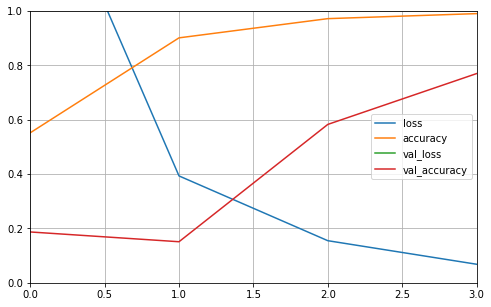

In [6]:
history = model.fit(x_train, y_train, epochs=4, validation_split=0.1,verbose=1)
utils.plot_fit_history(history)

In [7]:
y_pred = model.predict(x_test)

13/13 [==============================] - 4s 333ms/step


In [8]:
import seaborn as sns
label_names = ['A', 'B','C','D', 'E','F','G', 'H','I','J', 'K','L','M', 'N','O','P', 'Qu','R', 'S', 'T','U','V', 'W','X','Y','Z']

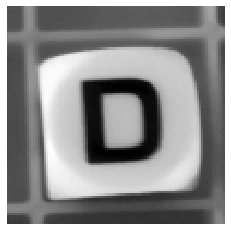

'C'

In [9]:
i = 50
plt.imshow(x_test[i], cmap="gray", interpolation="nearest")
plt.axis("off")
plt.show()
y = y_pred[i]
x = label_names

# sns.barplot(x=x, y=y)
x[np.argmax(y)]


In [10]:
dirpath = r"C:\Users\Alexandre\Documents\ecole\IT 4\IA\projet\boards"

size = [100,100]

board_image_load = np.empty((0,size[1], size[0]), int)

x_board = np.empty((0,size[1], size[0]), int)

trainPath = []
for path in os.listdir(dirpath):
    trainPath.append(path)
    
for path in os.listdir(dirpath):
    print(dirpath+"\\"+path)
    count = 1
    testImageNumber = random.sample(range(0,len(glob.glob(dirpath+"\\"+path+"\\*.png"))),round(len(glob.glob(dirpath+"\\"+path+"\\*.png"))*0.2))
    #on génére une suite de nombre aléatoire unique en regardant combien d'image se trouve dans le fichier, permet de séparer train/test
    label = trainPath.index(path)
    
    for png in tqdm(glob.glob(dirpath+"\\"+path)):
        count+=1
        image = cv2.imread(png,0)
        image = cv2.resize(image, (100, 100))
                
        if (count%40 == 39):
            x_board = np.append(x_board, board_image_load, axis=0)
            
            board_image_load = np.empty((0,size[1], size[0]), int)
            
        if (count not in testImageNumber):
            board_image_load = np.append(board_image_load, [image],axis = 0)
        else:     
            board_image_load = np.append(board_image_load, [image],axis = 0)
            

x_board = np.append(x_board, board_image_load, axis=0)

print("training image shape : "+str(x_board.shape))

C:\Users\Alexandre\Documents\ecole\IT 4\IA\projet\boards\board_1.png


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 41.66it/s]


C:\Users\Alexandre\Documents\ecole\IT 4\IA\projet\boards\board_2.png


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 41.50it/s]


C:\Users\Alexandre\Documents\ecole\IT 4\IA\projet\boards\board_3.png


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 41.66it/s]


C:\Users\Alexandre\Documents\ecole\IT 4\IA\projet\boards\board_4.png


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 41.67it/s]


C:\Users\Alexandre\Documents\ecole\IT 4\IA\projet\boards\board_5.png


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 62.38it/s]

training image shape : (5, 100, 100)


In [11]:
pred = model.predict(x_board)

1/1 [==============================] - 0s 136ms/step


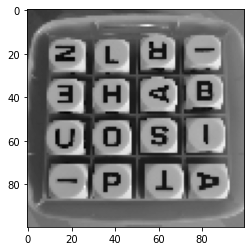

In [12]:
plt.imshow(x_board[0], cmap="gray")

<AxesSubplot:>

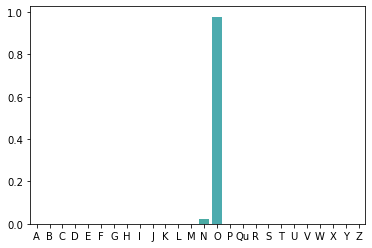

In [13]:
y = pred[2]
sns.barplot(x=x, y=y)

In [14]:
model_version = "0001"

model_name = "image_model"
model_path = os.path.join("C:/Users/Alexandre/Documents/ecole/IT 4/IA/projet/" + model_name, model_version)

tf.saved_model.save(model, model_path)

INFO:tensorflow:Assets written to: C:/Users/Alexandre/Documents/ecole/IT 4/IA/projet/image_model\0001\assets


INFO:tensorflow:Assets written to: C:/Users/Alexandre/Documents/ecole/IT 4/IA/projet/image_model\0001\assets


In [18]:
saved_model = tf.saved_model.load( model_path) 

In [19]:
X_new = x_test[:3]

y_pred = saved_model( tf.constant( X_new, dtype = tf.float32))
y_pred

ValueError: Could not find matching concrete function to call loaded from the SavedModel. Got:
  Positional arguments (3 total):
    * <tf.Tensor 'inputs:0' shape=(3, 100, 100) dtype=float32>
    * False
    * None
  Keyword arguments: {}

 Expected these arguments to match one of the following 4 option(s):

Option 1:
  Positional arguments (3 total):
    * TensorSpec(shape=(None, 100, 100, 1), dtype=tf.float32, name='conv2d_input')
    * False
    * None
  Keyword arguments: {}

Option 2:
  Positional arguments (3 total):
    * TensorSpec(shape=(None, 100, 100, 1), dtype=tf.float32, name='inputs')
    * False
    * None
  Keyword arguments: {}

Option 3:
  Positional arguments (3 total):
    * TensorSpec(shape=(None, 100, 100, 1), dtype=tf.float32, name='inputs')
    * True
    * None
  Keyword arguments: {}

Option 4:
  Positional arguments (3 total):
    * TensorSpec(shape=(None, 100, 100, 1), dtype=tf.float32, name='conv2d_input')
    * True
    * None
  Keyword arguments: {}